In [1]:
# Import Libraries and Dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import shap

# Load the dataset
df = pd.read_csv('/content/diabetes_prediction_dataset.csv')


In [2]:
#Step 2: Preprocessing the Data
# Fill missing values with median for numeric columns only
for col in df.select_dtypes(include=np.number):
    df[col] = df[col].fillna(df[col].median())

# Create severity labels
def severity_label(row):
    if row['blood_glucose_level'] < 140:
        return 'Early-Stage'
    elif 140 <= row['blood_glucose_level'] < 200:
        return 'Prediabetes'
    else:
        return 'Advanced Diabetes'

df['Severity'] = df.apply(severity_label, axis=1)

# Normalize data
scaler = MinMaxScaler()

# Select only numeric features for scaling
numeric_features = df.drop(columns=['Severity', 'diabetes']).select_dtypes(include=np.number).columns
df_scaled = scaler.fit_transform(df[numeric_features])  # Scaling only numeric features

# Split the dataset
X = df_scaled
y = df['Severity']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [3]:
#Step 3: Apply PCA for Dimensionality Reduction

pca = PCA(n_components=3)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Explained variance ratio
print("Explained variance ratio:", pca.explained_variance_ratio_)

Explained variance ratio: [0.37564051 0.21053591 0.15319142]


Random Forest Accuracy: 0.8635
                   precision    recall  f1-score   support

Advanced Diabetes       0.83      0.79      0.81      3257
      Early-Stage       0.88      0.88      0.88     13127
      Prediabetes       0.86      0.87      0.86     13616

         accuracy                           0.86     30000
        macro avg       0.86      0.85      0.85     30000
     weighted avg       0.86      0.86      0.86     30000



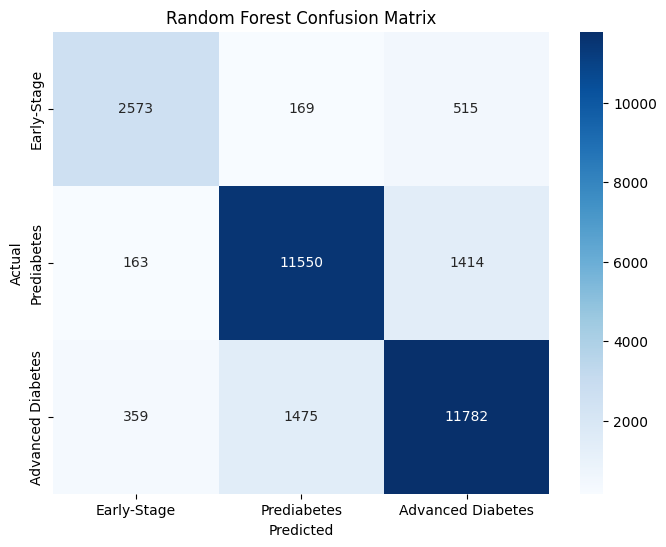

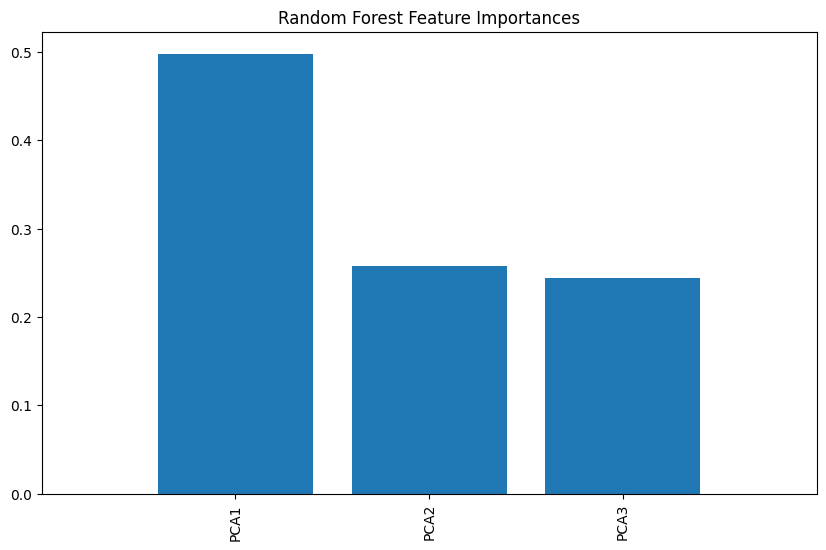

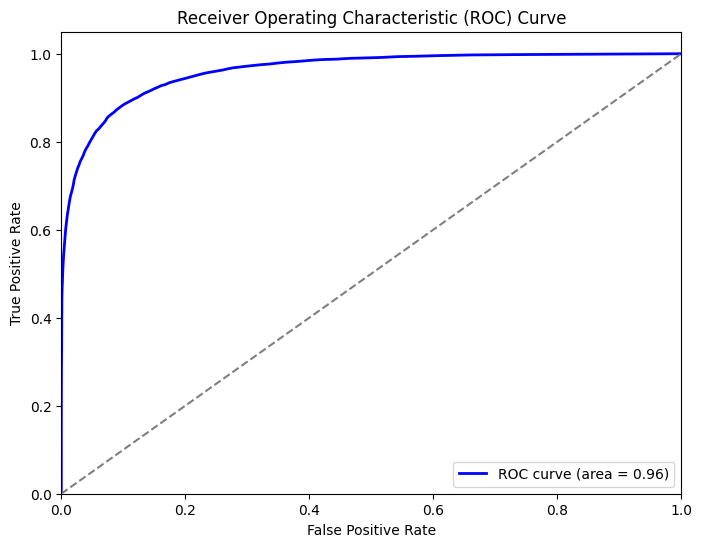


 Random Forest Accuracy: 86.35%


In [7]:
#Step 4: Train Model and Evaluate Performance
#Random Forest
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Train RandomForest model
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_pca, y_train)

# Predict on the test set
y_pred_rf = rf.predict(X_test_pca)

# Performance metrics
accuracy = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", accuracy)
print(classification_report(y_test, y_pred_rf))

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Blues',
            xticklabels=['Early-Stage', 'Prediabetes', 'Advanced Diabetes'],
            yticklabels=['Early-Stage', 'Prediabetes', 'Advanced Diabetes'])
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Additional Visualization: Feature Importance
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title('Random Forest Feature Importances')
plt.bar(range(X_train_pca.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train_pca.shape[1]), [f'PCA{i+1}' for i in range(X_train_pca.shape[1])], rotation=90)
plt.xlim([-1, X_train_pca.shape[1]])
plt.show()

# Additional Visualization: ROC Curve (Receiver Operating Characteristic Curve)
fpr, tpr, thresholds = roc_curve(y_test.astype('category').cat.codes, rf.predict_proba(X_test_pca)[:, 1], pos_label=1)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

print("\n Random Forest Accuracy: {:.2f}%".format(accuracy * 100))



